In [28]:



import pandas as pd
import numpy as np

import math

import glob
import os
from os import listdir
import gzip
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline


In [162]:

def retrun_lat_long(x, y):
    
    bound_left = 126.764467 
    bound_right = 127.183756
    bound_top = 37.701454
    bound_bottom = 37.428415

    Long_Diff = (bound_right-bound_left)/50
    Lat_Diff = (bound_top-bound_bottom)/50
    
    return bound_left+(x*Long_Diff), bound_bottom+(y*Lat_Diff)


In [5]:

df = pd.read_csv('./featured_data/df_grouped_50_30m.csv')
df = df[1:]
df.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,combine_coord,total_mins_quater,holiday,holiday.1,coord_x,coord_y,count,holid
1,0.0,"(0.0, 22.0)",31.0,1,0,0.0,22.0,1.0,0.0
2,1.0,"(0.0, 22.0)",375.0,2,0,0.0,22.0,2.0,0.0
3,2.0,"(0.0, 22.0)",712.0,1,0,0.0,22.0,1.0,0.0
4,3.0,"(0.0, 22.0)",1236.0,1,0,0.0,22.0,1.0,0.0
5,4.0,"(0.0, 22.0)",2279.0,1,0,0.0,22.0,1.0,0.0


In [169]:
print (len(df[(df['holid']==0)]), len(df[(df['holid']>0)]))

df_holid = df[(df['holid']==1)]
df_not_holid = df[(df['holid']==0)]

2819252 184312


In [178]:

def time_lap_df(dfp):
    coord_index = range(0,48)
    df_time_dayp = pd.DataFrame()
    df_time_dayp['time_lap'] = coord_index
    
    coord_list = []
    
    unique_coord = dfp['combine_coord'].unique()

    for item in unique_coord:
        df_tmp = dfp[(dfp['combine_coord']==item)]

        time_qtr = df_tmp['total_mins_quater']

        data_sets = np.zeros((48))

        for tmp in time_qtr:
            tmp_lap = tmp % 48 

            tmp_value = df_tmp[(df_tmp['total_mins_quater']==tmp)]['count'].values

            data_sets[int(tmp_lap)] += tmp_value
    #        print (tmp_lap, tmp_value)

        df_time_dayp[item] = data_sets
        coord_list.append(item)
        
    return df_time_dayp, coord_list


In [179]:

df_time_holid, coord_list_holid = time_lap_df(df_holid)
df_time_not_holid, coord_list_not_holid = time_lap_df(df_not_holid)



In [182]:

df_time_holid['col_sum'] = df_time_holid.sum(axis=1)
df_time_holid.head()



,time_lap,"(0.0, 23.0)","(3.0, 20.0)","(3.0, 21.0)","(3.0, 24.0)","(3.0, 27.0)","(4.0, 20.0)","(4.0, 21.0)","(4.0, 22.0)","(4.0, 23.0)","(4.0, 24.0)","(4.0, 25.0)","(4.0, 26.0)","(4.0, 27.0)","(4.0, 28.0)","(4.0, 29.0)","(4.0, 30.0)","(5.0, 21.0)","(5.0, 22.0)","(5.0, 23.0)","(5.0, 24.0)","(5.0, 25.0)","(5.0, 26.0)","(5.0, 27.0)","(5.0, 28.0)","(6.0, 8.0)","(6.0, 9.0)","(6.0, 10.0)","(6.0, 11.0)","(6.0, 12.0)","(6.0, 19.0)","(6.0, 20.0)","(6.0, 21.0)","(6.0, 22.0)","(6.0, 23.0)","(6.0, 24.0)","(6.0, 25.0)","(6.0, 26.0)","(6.0, 27.0)","(6.0, 28.0)","(7.0, 8.0)","(7.0, 9.0)","(7.0, 10.0)","(7.0, 11.0)","(7.0, 12.0)","(7.0, 13.0)","(7.0, 14.0)","(7.0, 15.0)","(7.0, 16.0)","(7.0, 17.0)",...,"(44.0, 20.0)","(44.0, 21.0)","(44.0, 22.0)","(44.0, 23.0)","(44.0, 24.0)","(45.0, 8.0)","(45.0, 9.0)","(45.0, 10.0)","(45.0, 11.0)","(45.0, 12.0)","(45.0, 13.0)","(45.0, 15.0)","(45.0, 16.0)","(45.0, 17.0)","(45.0, 18.0)","(45.0, 19.0)","(45.0, 20.0)","(45.0, 21.0)","(45.0, 22.0)","(45.0, 23.0)","(45.0, 24.0)","(45.0, 25.0)","(46.0, 11.0)","(46.0, 12.0)","(46.0, 13.0)","(46.0, 19.0)","(46.0, 20.0)","(46.0, 21.0)","(46.0, 22.0)","(46.0, 23.0)","(46.0, 24.0)","(47.0, 12.0)","(47.0, 13.0)","(47.0, 21.0)","(47.0, 22.0)","(47.0, 23.0)","(47.0, 24.0)","(47.0, 25.0)","(48.0, 21.0)","(48.0, 22.0)","(48.0, 23.0)","(48.0, 24.0)","(48.0, 25.0)","(48.0, 26.0)","(48.0, 27.0)","(49.0, 22.0)","(49.0, 23.0)","(49.0, 24.0)","(49.0, 25.0)",col_sum
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,2.0,...,0.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,1.0,2.0,0.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,902.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,2.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,935.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,4.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1000.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,...,0.0,3.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,3.0,4.0,1.0,0.0,0.0,3.0,2.0,2.0,1097.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1188.0


In [183]:

df_time_not_holid['col_sum'] = df_time_not_holid.sum(axis=1)
df_time_not_holid.head()



,time_lap,"(0.0, 22.0)","(0.0, 23.0)","(1.0, 23.0)","(1.0, 24.0)","(2.0, 23.0)","(2.0, 25.0)","(2.0, 26.0)","(2.0, 27.0)","(3.0, 20.0)","(3.0, 21.0)","(3.0, 23.0)","(3.0, 24.0)","(3.0, 25.0)","(3.0, 27.0)","(3.0, 28.0)","(4.0, 19.0)","(4.0, 20.0)","(4.0, 21.0)","(4.0, 22.0)","(4.0, 23.0)","(4.0, 24.0)","(4.0, 25.0)","(4.0, 26.0)","(4.0, 27.0)","(4.0, 28.0)","(4.0, 29.0)","(4.0, 30.0)","(5.0, 11.0)","(5.0, 12.0)","(5.0, 20.0)","(5.0, 21.0)","(5.0, 22.0)","(5.0, 23.0)","(5.0, 24.0)","(5.0, 25.0)","(5.0, 26.0)","(5.0, 27.0)","(5.0, 28.0)","(5.0, 29.0)","(5.0, 30.0)","(6.0, 8.0)","(6.0, 9.0)","(6.0, 10.0)","(6.0, 11.0)","(6.0, 12.0)","(6.0, 13.0)","(6.0, 19.0)","(6.0, 20.0)","(6.0, 21.0)",...,"(45.0, 10.0)","(45.0, 11.0)","(45.0, 12.0)","(45.0, 13.0)","(45.0, 15.0)","(45.0, 16.0)","(45.0, 17.0)","(45.0, 18.0)","(45.0, 19.0)","(45.0, 20.0)","(45.0, 21.0)","(45.0, 22.0)","(45.0, 23.0)","(45.0, 24.0)","(45.0, 25.0)","(46.0, 11.0)","(46.0, 12.0)","(46.0, 13.0)","(46.0, 19.0)","(46.0, 20.0)","(46.0, 21.0)","(46.0, 22.0)","(46.0, 23.0)","(46.0, 24.0)","(46.0, 25.0)","(47.0, 11.0)","(47.0, 12.0)","(47.0, 13.0)","(47.0, 20.0)","(47.0, 21.0)","(47.0, 22.0)","(47.0, 23.0)","(47.0, 24.0)","(47.0, 25.0)","(47.0, 26.0)","(48.0, 21.0)","(48.0, 22.0)","(48.0, 23.0)","(48.0, 24.0)","(48.0, 25.0)","(48.0, 26.0)","(48.0, 27.0)","(49.0, 21.0)","(49.0, 22.0)","(49.0, 23.0)","(49.0, 24.0)","(49.0, 25.0)","(49.0, 26.0)","(49.0, 27.0)",col_sum
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,12.0,0.0,48.0,3.0,0.0,0.0,16.0,0.0,133.0,1025.0,93.0,125.0,51.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,202.0,1128.0,197.0,273.0,206.0,0.0,0.0,0.0,2.0,0.0,7.0,310.0,32.0,0.0,0.0,3.0,55.0,...,2.0,147.0,193.0,66.0,0.0,3.0,27.0,151.0,158.0,169.0,278.0,228.0,67.0,20.0,0.0,28.0,180.0,30.0,7.0,5.0,34.0,281.0,212.0,137.0,0.0,0.0,20.0,0.0,0.0,2.0,11.0,62.0,77.0,5.0,2.0,75.0,273.0,194.0,116.0,77.0,0.0,1.0,2.0,116.0,23.0,114.0,97.0,0.0,0.0,725107.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,33.0,1.0,0.0,0.0,2.0,0.0,103.0,769.0,82.0,77.0,40.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,39.0,158.0,882.0,166.0,208.0,152.0,1.0,0.0,0.0,1.0,0.0,5.0,147.0,39.0,0.0,0.0,0.0,34.0,...,1.0,135.0,105.0,39.0,0.0,1.0,29.0,101.0,155.0,128.0,230.0,181.0,60.0,8.0,0.0,40.0,123.0,16.0,6.0,7.0,20.0,162.0,77.0,113.0,0.0,0.0,17.0,2.0,0.0,9.0,6.0,33.0,33.0,1.0,0.0,76.0,174.0,126.0,73.0,48.0,0.0,2.0,1.0,57.0,15.0,113.0,54.0,0.0,0.0,610973.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,20.0,1.0,0.0,0.0,1.0,0.0,29.0,315.0,39.0,50.0,26.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,28.0,135.0,678.0,153.0,165.0,97.0,0.0,1.0,0.0,6.0,0.0,2.0,141.0,20.0,0.0,1.0,0.0,24.0,...,2.0,131.0,93.0,33.0,1.0,2.0,21.0,103.0,113.0,102.0,164.0,114.0,46.0,2.0,1.0,32.0,100.0,19.0,2.0,1.0,25.0,150.0,83.0,76.0,0.0,0.0,11.0,1.0,1.0,10.0,14.0,46.0,41.0,2.0,2.0,63.0,154.0,124.0,63.0,43.0,0.0,3.0,1.0,36.0,16.0,83.0,52.0,1.0,0.0,532310.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,13.0,0.0,0.0,0.0,3.0,1.0,11.0,115.0,19.0,36.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,93.0,560.0,112.0,138.0,83.0,0.0,0.0,0.0,0.0,1.0,4.0,14.0,23.0,0.0,0.0,0.0,18.0,...,1.0,75.0,85.0,33.0,0.0,3.0,18.0,53.0,113.0,84.0,134.0,86.0,37.0,5.0,0.0,20.0,80.0,5.0,1.0,3.0,16.0,103.0,55.0,61.0,0.0,0.0,9.0,1.0,0.0,6.0,4.0,2.0,39.0,1.0,1.0,44.0,89.0,75.0,59.0,30.0,1.0,2.0,0.0,21.0,5.0,71.0,29.0,1.0,0.0,407377.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,5.0,0.0,3.0,73.0,21.0,30.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,48.0,338.0,89.0,124.0,48.0,0.0,0.0,0.0,3.0,0.0,1.0,33.0,17.0,0.0,1.0,0.0,13.0,...,0.0,59.0,70.0,24.0,0.0,2.0,30.0,41.0,81.0,85.0,118.0,59.0,29.0,6.0,0.0,14.0,45.0,14.0,1.0,1.0,17.0,89.0,56.0,55.0,0.0,0.0,6.0,2.0,0.0,5.0,5.0,5.0,23.0,0.0,0.0,29.0,92.0,30.0,32.0,30.0,1.0,1.0,0.0,19.0,8.0,58.0,26.0,2.0,0.0,317167.0


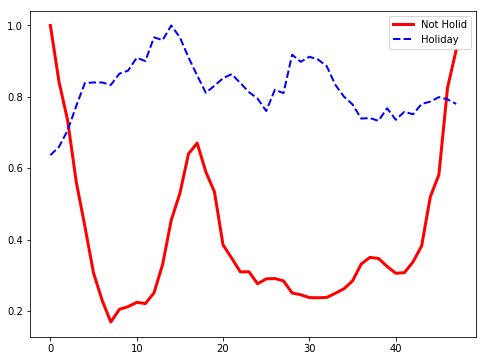

In [185]:

plt.figure(figsize=(8, 6))
#plt.xticks(np.arange(24))#, (time_axis))
#plt.xticks(np.arange(0, 48, step=2))
plt.plot(coord_index, df_time_not_holid['col_sum']/df_time_not_holid['col_sum'].max(), 'r-',  linewidth=3.0, label='Not Holid')
plt.plot(coord_index, df_time_holid['col_sum']/df_time_holid['col_sum'].max(), 'b--',  linewidth=2.0, label='Holiday')
plt.legend()



In [11]:

df_grouped = df[[ 'combine_coord', 'holid']].groupby(['combine_coord']).agg(['count']).reset_index()
print (len(df_grouped))
df_grouped['count'] = df_grouped['holid']['count']
print (df_grouped['count'].max())
df_grouped.head()



1343
3841


,combine_coord,holid,count
,,count,
0,"(0.0, 22.0)",8,8
1,"(0.0, 23.0)",21,21
2,"(1.0, 23.0)",2,2
3,"(1.0, 24.0)",2,2
4,"(10.0, 10.0)",3102,3102


In [18]:
df_new=pd.DataFrame()
#df_new.index = df_grouped.index
df_new['combine_coord'] = df_grouped['combine_coord']
df_new['count'] = df_grouped['count']
df_new.head()

,combine_coord,count
0,"(0.0, 22.0)",8
1,"(0.0, 23.0)",21
2,"(1.0, 23.0)",2
3,"(1.0, 24.0)",2
4,"(10.0, 10.0)",3102


In [21]:
df_new.sort_values(by=['count'], axis=0, ascending=False).head()

,combine_coord,count
731,"(32.0, 12.0)",3841
691,"(31.0, 14.0)",3841
733,"(32.0, 14.0)",3841
648,"(30.0, 14.0)",3841
732,"(32.0, 13.0)",3840


In [42]:
df_selected = df[(df['coord_x'] == 32)&(df['coord_y'] == 13)]
df_selected.head()

,Unnamed: 0,combine_coord,total_mins_quater,holiday,holiday.1,coord_x,coord_y,count,holid
1902683,1902682.0,"(32.0, 13.0)",0.0,11,0,32.0,13.0,11.0,0.0
1902684,1902683.0,"(32.0, 13.0)",1.0,20,0,32.0,13.0,20.0,0.0
1902685,1902684.0,"(32.0, 13.0)",2.0,12,0,32.0,13.0,12.0,0.0
1902686,1902685.0,"(32.0, 13.0)",3.0,18,0,32.0,13.0,18.0,0.0
1902687,1902686.0,"(32.0, 13.0)",4.0,19,0,32.0,13.0,19.0,0.0


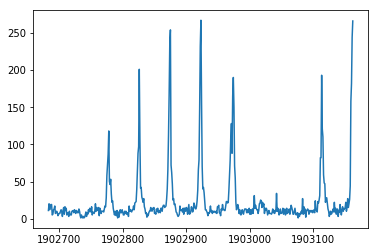

In [73]:
plt.plot(df_selected['count'][:480])

In [93]:

df_coord = pd.DataFrame()
df_coord['unique_coord'] = df['combine_coord'].unique()[:-1]
df_coord.head()


,unique_coord
0,"(0.0, 22.0)"
1,"(0.0, 23.0)"
2,"(1.0, 23.0)"
3,"(1.0, 24.0)"
4,"(2.0, 23.0)"


In [94]:
df_coord['unique_coord'].values

array(['(0.0, 22.0)', '(0.0, 23.0)', '(1.0, 23.0)', ..., '(49.0, 24.0)',
       '(49.0, 25.0)', '(49.0, 26.0)'], dtype=object)

In [92]:
len_coord = len(df_coord['unique_coord'].values)
len_coord

1342

In [98]:

coord_index = range(0,48)
df_time_day = pd.DataFrame()
df_time_day['time_lap'] = coord_index
df_time_day.head()


,time_lap
0,0
1,1
2,2
3,3
4,4


In [108]:

coord_list = []
coord_index = range(0,48)


for item in df_coord['unique_coord'].values:
    df_tmp = df[(df['combine_coord']==item)]
    
    time_qtr = df_tmp['total_mins_quater']
    
    data_sets = np.zeros((48))
    
    for tmp in time_qtr:
        tmp_lap = tmp % 48 
        
        tmp_value = df_tmp[(df_tmp['total_mins_quater']==tmp)]['count'].values
        
        data_sets[int(tmp_lap)] += tmp_value
#        print (tmp_lap, tmp_value)
    
    df_time_day[item] = data_sets
    coord_list.append(item)
#    print (len(df_tmp))



In [109]:
data_sets.shape

(48,)

In [114]:
df_time_day.head()

,time_lap,"(0.0, 22.0)","(0.0, 23.0)","(1.0, 23.0)","(1.0, 24.0)","(2.0, 23.0)","(2.0, 25.0)","(2.0, 26.0)","(2.0, 27.0)","(3.0, 20.0)","(3.0, 21.0)","(3.0, 23.0)","(3.0, 24.0)","(3.0, 25.0)","(3.0, 27.0)","(3.0, 28.0)","(4.0, 19.0)","(4.0, 20.0)","(4.0, 21.0)","(4.0, 22.0)","(4.0, 23.0)","(4.0, 24.0)","(4.0, 25.0)","(4.0, 26.0)","(4.0, 27.0)","(4.0, 28.0)","(4.0, 29.0)","(4.0, 30.0)","(5.0, 11.0)","(5.0, 12.0)","(5.0, 20.0)","(5.0, 21.0)","(5.0, 22.0)","(5.0, 23.0)","(5.0, 24.0)","(5.0, 25.0)","(5.0, 26.0)","(5.0, 27.0)","(5.0, 28.0)","(5.0, 29.0)","(5.0, 30.0)","(6.0, 8.0)","(6.0, 9.0)","(6.0, 10.0)","(6.0, 11.0)","(6.0, 12.0)","(6.0, 13.0)","(6.0, 19.0)","(6.0, 20.0)","(6.0, 21.0)",...,"(45.0, 8.0)","(45.0, 9.0)","(45.0, 10.0)","(45.0, 11.0)","(45.0, 12.0)","(45.0, 13.0)","(45.0, 15.0)","(45.0, 16.0)","(45.0, 17.0)","(45.0, 18.0)","(45.0, 19.0)","(45.0, 20.0)","(45.0, 21.0)","(45.0, 22.0)","(45.0, 23.0)","(45.0, 24.0)","(45.0, 25.0)","(46.0, 11.0)","(46.0, 12.0)","(46.0, 13.0)","(46.0, 19.0)","(46.0, 20.0)","(46.0, 21.0)","(46.0, 22.0)","(46.0, 23.0)","(46.0, 24.0)","(46.0, 25.0)","(47.0, 11.0)","(47.0, 12.0)","(47.0, 13.0)","(47.0, 20.0)","(47.0, 21.0)","(47.0, 22.0)","(47.0, 23.0)","(47.0, 24.0)","(47.0, 25.0)","(47.0, 26.0)","(48.0, 21.0)","(48.0, 22.0)","(48.0, 23.0)","(48.0, 24.0)","(48.0, 25.0)","(48.0, 26.0)","(48.0, 27.0)","(49.0, 21.0)","(49.0, 22.0)","(49.0, 23.0)","(49.0, 24.0)","(49.0, 25.0)","(49.0, 26.0)"
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,12.0,0.0,56.0,3.0,0.0,0.0,16.0,0.0,141.0,1102.0,104.0,135.0,51.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,217.0,1280.0,215.0,321.0,233.0,0.0,0.0,0.0,2.0,0.0,7.0,331.0,35.0,0.0,0.0,3.0,59.0,...,84.0,102.0,2.0,161.0,209.0,75.0,0.0,3.0,27.0,160.0,180.0,188.0,295.0,239.0,72.0,20.0,0.0,33.0,202.0,35.0,7.0,5.0,37.0,315.0,232.0,151.0,0.0,0.0,20.0,0.0,0.0,5.0,12.0,66.0,84.0,5.0,2.0,85.0,285.0,215.0,121.0,79.0,0.0,1.0,2.0,118.0,25.0,124.0,104.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,38.0,1.0,0.0,0.0,2.0,0.0,117.0,852.0,90.0,83.0,45.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,43.0,165.0,1004.0,184.0,239.0,171.0,1.0,0.0,0.0,1.0,0.0,9.0,153.0,40.0,0.0,0.0,0.0,37.0,...,105.0,62.0,1.0,141.0,120.0,48.0,1.0,2.0,29.0,112.0,168.0,143.0,272.0,198.0,69.0,8.0,0.0,43.0,139.0,19.0,6.0,7.0,22.0,169.0,90.0,124.0,0.0,0.0,18.0,2.0,0.0,10.0,7.0,42.0,35.0,1.0,0.0,86.0,184.0,131.0,86.0,58.0,0.0,2.0,1.0,60.0,19.0,120.0,61.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,20.0,1.0,0.0,0.0,1.0,0.0,34.0,362.0,40.0,54.0,31.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,29.0,145.0,737.0,162.0,178.0,114.0,0.0,1.0,0.0,7.0,0.0,4.0,152.0,25.0,0.0,1.0,0.0,28.0,...,61.0,71.0,3.0,146.0,105.0,38.0,1.0,3.0,23.0,111.0,126.0,119.0,190.0,128.0,53.0,2.0,1.0,36.0,110.0,25.0,2.0,2.0,25.0,168.0,91.0,81.0,0.0,0.0,13.0,1.0,1.0,12.0,14.0,49.0,43.0,2.0,2.0,68.0,171.0,129.0,73.0,48.0,0.0,3.0,1.0,36.0,18.0,93.0,56.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,14.0,0.0,0.0,0.0,4.0,1.0,14.0,134.0,22.0,43.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,102.0,630.0,119.0,152.0,90.0,0.0,0.0,0.0,0.0,1.0,4.0,17.0,26.0,0.0,0.0,0.0,19.0,...,40.0,61.0,1.0,83.0,89.0,38.0,0.0,3.0,19.0,60.0,124.0,96.0,151.0,100.0,41.0,6.0,0.0,24.0,85.0,7.0,1.0,7.0,17.0,109.0,70.0,65.0,0.0,0.0,14.0,1.0,0.0,7.0,4.0,3.0,42.0,1.0,1.0,46.0,97.0,79.0,64.0,37.0,2.0,4.0,0.0,21.0,8.0,75.0,33.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,5.0,0.0,4.0,83.0,24.0,32.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,52.0,372.0,100.0,135.0,61.0,0.0,0.0,0.0,4.0,0.0,1.0,34.0,21.0,0.0,1.0,0.0,16.0,...,20.0,33.0,0.0,64.0,79.0,25.0,0.0,2.0,31.0,51.0,87.0,94.0,128.0,63.0,31.0,6.0,0.0,15.0,48.0,16.0,1.0,1.0,19.0,98.0,61.0,60.0,0.0,0.0,7.0,2.0,0.0,6.0,6.0,7.0,24.0,0.0,0.0,34.0,95.0,34.0,38.0,30.0,1.0,1.0,0.0,19.0,9.0,60.0,28.0,2.0


In [116]:
df_time_day_copy = df_time_day.set_index('time_lap')
df_time_day_copy.head()


,"(0.0, 22.0)","(0.0, 23.0)","(1.0, 23.0)","(1.0, 24.0)","(2.0, 23.0)","(2.0, 25.0)","(2.0, 26.0)","(2.0, 27.0)","(3.0, 20.0)","(3.0, 21.0)","(3.0, 23.0)","(3.0, 24.0)","(3.0, 25.0)","(3.0, 27.0)","(3.0, 28.0)","(4.0, 19.0)","(4.0, 20.0)","(4.0, 21.0)","(4.0, 22.0)","(4.0, 23.0)","(4.0, 24.0)","(4.0, 25.0)","(4.0, 26.0)","(4.0, 27.0)","(4.0, 28.0)","(4.0, 29.0)","(4.0, 30.0)","(5.0, 11.0)","(5.0, 12.0)","(5.0, 20.0)","(5.0, 21.0)","(5.0, 22.0)","(5.0, 23.0)","(5.0, 24.0)","(5.0, 25.0)","(5.0, 26.0)","(5.0, 27.0)","(5.0, 28.0)","(5.0, 29.0)","(5.0, 30.0)","(6.0, 8.0)","(6.0, 9.0)","(6.0, 10.0)","(6.0, 11.0)","(6.0, 12.0)","(6.0, 13.0)","(6.0, 19.0)","(6.0, 20.0)","(6.0, 21.0)","(6.0, 22.0)",...,"(45.0, 8.0)","(45.0, 9.0)","(45.0, 10.0)","(45.0, 11.0)","(45.0, 12.0)","(45.0, 13.0)","(45.0, 15.0)","(45.0, 16.0)","(45.0, 17.0)","(45.0, 18.0)","(45.0, 19.0)","(45.0, 20.0)","(45.0, 21.0)","(45.0, 22.0)","(45.0, 23.0)","(45.0, 24.0)","(45.0, 25.0)","(46.0, 11.0)","(46.0, 12.0)","(46.0, 13.0)","(46.0, 19.0)","(46.0, 20.0)","(46.0, 21.0)","(46.0, 22.0)","(46.0, 23.0)","(46.0, 24.0)","(46.0, 25.0)","(47.0, 11.0)","(47.0, 12.0)","(47.0, 13.0)","(47.0, 20.0)","(47.0, 21.0)","(47.0, 22.0)","(47.0, 23.0)","(47.0, 24.0)","(47.0, 25.0)","(47.0, 26.0)","(48.0, 21.0)","(48.0, 22.0)","(48.0, 23.0)","(48.0, 24.0)","(48.0, 25.0)","(48.0, 26.0)","(48.0, 27.0)","(49.0, 21.0)","(49.0, 22.0)","(49.0, 23.0)","(49.0, 24.0)","(49.0, 25.0)","(49.0, 26.0)"
time_lap,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,12.0,0.0,56.0,3.0,0.0,0.0,16.0,0.0,141.0,1102.0,104.0,135.0,51.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,217.0,1280.0,215.0,321.0,233.0,0.0,0.0,0.0,2.0,0.0,7.0,331.0,35.0,0.0,0.0,3.0,59.0,109.0,...,84.0,102.0,2.0,161.0,209.0,75.0,0.0,3.0,27.0,160.0,180.0,188.0,295.0,239.0,72.0,20.0,0.0,33.0,202.0,35.0,7.0,5.0,37.0,315.0,232.0,151.0,0.0,0.0,20.0,0.0,0.0,5.0,12.0,66.0,84.0,5.0,2.0,85.0,285.0,215.0,121.0,79.0,0.0,1.0,2.0,118.0,25.0,124.0,104.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,38.0,1.0,0.0,0.0,2.0,0.0,117.0,852.0,90.0,83.0,45.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,43.0,165.0,1004.0,184.0,239.0,171.0,1.0,0.0,0.0,1.0,0.0,9.0,153.0,40.0,0.0,0.0,0.0,37.0,77.0,...,105.0,62.0,1.0,141.0,120.0,48.0,1.0,2.0,29.0,112.0,168.0,143.0,272.0,198.0,69.0,8.0,0.0,43.0,139.0,19.0,6.0,7.0,22.0,169.0,90.0,124.0,0.0,0.0,18.0,2.0,0.0,10.0,7.0,42.0,35.0,1.0,0.0,86.0,184.0,131.0,86.0,58.0,0.0,2.0,1.0,60.0,19.0,120.0,61.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,20.0,1.0,0.0,0.0,1.0,0.0,34.0,362.0,40.0,54.0,31.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,29.0,145.0,737.0,162.0,178.0,114.0,0.0,1.0,0.0,7.0,0.0,4.0,152.0,25.0,0.0,1.0,0.0,28.0,58.0,...,61.0,71.0,3.0,146.0,105.0,38.0,1.0,3.0,23.0,111.0,126.0,119.0,190.0,128.0,53.0,2.0,1.0,36.0,110.0,25.0,2.0,2.0,25.0,168.0,91.0,81.0,0.0,0.0,13.0,1.0,1.0,12.0,14.0,49.0,43.0,2.0,2.0,68.0,171.0,129.0,73.0,48.0,0.0,3.0,1.0,36.0,18.0,93.0,56.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,14.0,0.0,0.0,0.0,4.0,1.0,14.0,134.0,22.0,43.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,102.0,630.0,119.0,152.0,90.0,0.0,0.0,0.0,0.0,1.0,4.0,17.0,26.0,0.0,0.0,0.0,19.0,41.0,...,40.0,61.0,1.0,83.0,89.0,38.0,0.0,3.0,19.0,60.0,124.0,96.0,151.0,100.0,41.0,6.0,0.0,24.0,85.0,7.0,1.0,7.0,17.0,109.0,70.0,65.0,0.0,0.0,14.0,1.0,0.0,7.0,4.0,3.0,42.0,1.0,1.0,46.0,97.0,79.0,64.0,37.0,2.0,4.0,0.0,21.0,8.0,75.0,33.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,5.0,0.0,4.0,83.0,24.0,32.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,52.0,372.0,100.0,135.0,61.0,0.0,0.0,0.0,4.0,0.0,1.0,34.0,21.0,0.0,1.0,0.0,16.0,58.0,...,20.0,33.0,0.0,64.0,79.0,25.0,0.0,2.0,31.0,51.0,87.0,94.0,128.0,63.0,31.0,6.0,0.0,15.0,48.0,16.0,1.0,1.0,19.0,98.0,61.0,60.0,0.0,0.0,7.0,2.0,0.0,6.0,6.0,7.0,24.0,0.0,0.0,34.0,95.0,34.0,38.0,30.0,1.0,1.0,0.0,19.0,9.0,60.0,28.0,2.0


In [118]:
df_time_day_copy['col_sum'] = df_time_day_copy.sum(axis=1)
df_time_day_copy.head()

,"(0.0, 22.0)","(0.0, 23.0)","(1.0, 23.0)","(1.0, 24.0)","(2.0, 23.0)","(2.0, 25.0)","(2.0, 26.0)","(2.0, 27.0)","(3.0, 20.0)","(3.0, 21.0)","(3.0, 23.0)","(3.0, 24.0)","(3.0, 25.0)","(3.0, 27.0)","(3.0, 28.0)","(4.0, 19.0)","(4.0, 20.0)","(4.0, 21.0)","(4.0, 22.0)","(4.0, 23.0)","(4.0, 24.0)","(4.0, 25.0)","(4.0, 26.0)","(4.0, 27.0)","(4.0, 28.0)","(4.0, 29.0)","(4.0, 30.0)","(5.0, 11.0)","(5.0, 12.0)","(5.0, 20.0)","(5.0, 21.0)","(5.0, 22.0)","(5.0, 23.0)","(5.0, 24.0)","(5.0, 25.0)","(5.0, 26.0)","(5.0, 27.0)","(5.0, 28.0)","(5.0, 29.0)","(5.0, 30.0)","(6.0, 8.0)","(6.0, 9.0)","(6.0, 10.0)","(6.0, 11.0)","(6.0, 12.0)","(6.0, 13.0)","(6.0, 19.0)","(6.0, 20.0)","(6.0, 21.0)","(6.0, 22.0)",...,"(45.0, 9.0)","(45.0, 10.0)","(45.0, 11.0)","(45.0, 12.0)","(45.0, 13.0)","(45.0, 15.0)","(45.0, 16.0)","(45.0, 17.0)","(45.0, 18.0)","(45.0, 19.0)","(45.0, 20.0)","(45.0, 21.0)","(45.0, 22.0)","(45.0, 23.0)","(45.0, 24.0)","(45.0, 25.0)","(46.0, 11.0)","(46.0, 12.0)","(46.0, 13.0)","(46.0, 19.0)","(46.0, 20.0)","(46.0, 21.0)","(46.0, 22.0)","(46.0, 23.0)","(46.0, 24.0)","(46.0, 25.0)","(47.0, 11.0)","(47.0, 12.0)","(47.0, 13.0)","(47.0, 20.0)","(47.0, 21.0)","(47.0, 22.0)","(47.0, 23.0)","(47.0, 24.0)","(47.0, 25.0)","(47.0, 26.0)","(48.0, 21.0)","(48.0, 22.0)","(48.0, 23.0)","(48.0, 24.0)","(48.0, 25.0)","(48.0, 26.0)","(48.0, 27.0)","(49.0, 21.0)","(49.0, 22.0)","(49.0, 23.0)","(49.0, 24.0)","(49.0, 25.0)","(49.0, 26.0)",col_sum
time_lap,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,12.0,0.0,56.0,3.0,0.0,0.0,16.0,0.0,141.0,1102.0,104.0,135.0,51.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,217.0,1280.0,215.0,321.0,233.0,0.0,0.0,0.0,2.0,0.0,7.0,331.0,35.0,0.0,0.0,3.0,59.0,109.0,...,102.0,2.0,161.0,209.0,75.0,0.0,3.0,27.0,160.0,180.0,188.0,295.0,239.0,72.0,20.0,0.0,33.0,202.0,35.0,7.0,5.0,37.0,315.0,232.0,151.0,0.0,0.0,20.0,0.0,0.0,5.0,12.0,66.0,84.0,5.0,2.0,85.0,285.0,215.0,121.0,79.0,0.0,1.0,2.0,118.0,25.0,124.0,104.0,0.0,780219.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,38.0,1.0,0.0,0.0,2.0,0.0,117.0,852.0,90.0,83.0,45.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,43.0,165.0,1004.0,184.0,239.0,171.0,1.0,0.0,0.0,1.0,0.0,9.0,153.0,40.0,0.0,0.0,0.0,37.0,77.0,...,62.0,1.0,141.0,120.0,48.0,1.0,2.0,29.0,112.0,168.0,143.0,272.0,198.0,69.0,8.0,0.0,43.0,139.0,19.0,6.0,7.0,22.0,169.0,90.0,124.0,0.0,0.0,18.0,2.0,0.0,10.0,7.0,42.0,35.0,1.0,0.0,86.0,184.0,131.0,86.0,58.0,0.0,2.0,1.0,60.0,19.0,120.0,61.0,0.0,674590.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,20.0,1.0,0.0,0.0,1.0,0.0,34.0,362.0,40.0,54.0,31.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,29.0,145.0,737.0,162.0,178.0,114.0,0.0,1.0,0.0,7.0,0.0,4.0,152.0,25.0,0.0,1.0,0.0,28.0,58.0,...,71.0,3.0,146.0,105.0,38.0,1.0,3.0,23.0,111.0,126.0,119.0,190.0,128.0,53.0,2.0,1.0,36.0,110.0,25.0,2.0,2.0,25.0,168.0,91.0,81.0,0.0,0.0,13.0,1.0,1.0,12.0,14.0,49.0,43.0,2.0,2.0,68.0,171.0,129.0,73.0,48.0,0.0,3.0,1.0,36.0,18.0,93.0,56.0,1.0,605820.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,14.0,0.0,0.0,0.0,4.0,1.0,14.0,134.0,22.0,43.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,102.0,630.0,119.0,152.0,90.0,0.0,0.0,0.0,0.0,1.0,4.0,17.0,26.0,0.0,0.0,0.0,19.0,41.0,...,61.0,1.0,83.0,89.0,38.0,0.0,3.0,19.0,60.0,124.0,96.0,151.0,100.0,41.0,6.0,0.0,24.0,85.0,7.0,1.0,7.0,17.0,109.0,70.0,65.0,0.0,0.0,14.0,1.0,0.0,7.0,4.0,3.0,42.0,1.0,1.0,46.0,97.0,79.0,64.0,37.0,2.0,4.0,0.0,21.0,8.0,75.0,33.0,1.0,468394.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,5.0,0.0,4.0,83.0,24.0,32.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,52.0,372.0,100.0,135.0,61.0,0.0,0.0,0.0,4.0,0.0,1.0,34.0,21.0,0.0,1.0,0.0,16.0,58.0,...,33.0,0.0,64.0,79.0,25.0,0.0,2.0,31.0,51.0,87.0,94.0,128.0,63.0,31.0,6.0,0.0,15.0,48.0,16.0,1.0,1.0,19.0,98.0,61.0,60.0,0.0,0.0,7.0,2.0,0.0,6.0,6.0,7.0,24.0,0.0,0.0,34.0,95.0,34.0,38.0,30.0,1.0,1.0,0.0,19.0,9.0,60.0,28.0,2.0,368025.0


In [132]:
time_axis = ['0h', '0h30m', '1h', '1h30m',
            '2h', '2h30m', '3h', '3h30m',
            '4h', '4h30m', '5h', '5h30m',
            '6h', '6h30m', '7h', '7h30m',
            '8h', '8h30m', '9h', '9h30m',
            '10h', '10h30m', '11h', '11h30m',
            '12h', '12h30m', '13h', '13h30m',
            '14h', '14h30m', '15h', '15h30m',
            '16h', '16h30m', '17h', '17h30m',
            '18h', '18h30m', '19h', '19h30m',
            '20h', '20h30m', '21h', '21h30m',
            '22h', '23h30m', '23h', '23h30m',]
len(time_axis)

48

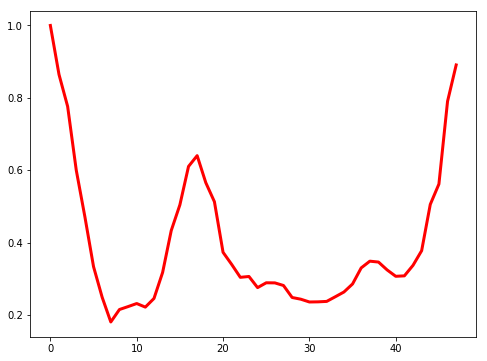

In [149]:
plt.figure(figsize=(8, 6))
#plt.xticks(np.arange(24))#, (time_axis))
#plt.xticks(np.arange(0, 48, step=2))
plt.plot(coord_index, df_time_day_copy['col_sum']/df_time_day_copy['col_sum'].max(), 'r-',  linewidth=3.0)


(127.1418271, 37.54309138)


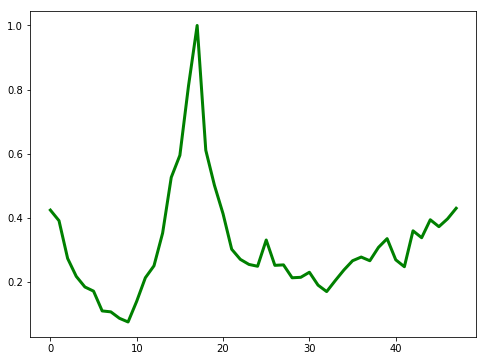

In [163]:
col_name = '(45.0, 21.0)'
plt.figure(figsize=(8, 6))
plt.plot(coord_index, df_time_day_copy[col_name]/df_time_day_copy[col_name].max(), 'g-', linewidth=3.0)

print (retrun_lat_long(45, 21))


(126.79801012, 37.55947372)


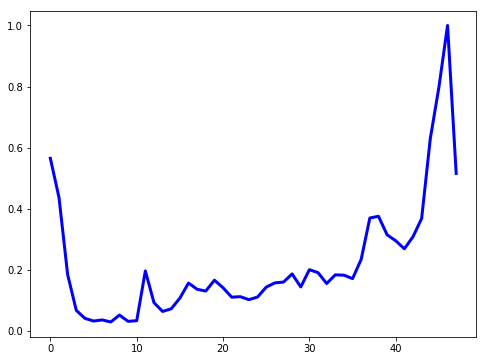

In [167]:
col_name = '(4.0, 24.0)'
plt.figure(figsize=(8, 6))
plt.plot(coord_index, df_time_day_copy[col_name]/df_time_day_copy[col_name].max(), 'b-', linewidth=3.0)

print (retrun_lat_long(4, 24))



## PM 11:30 Real Demand 

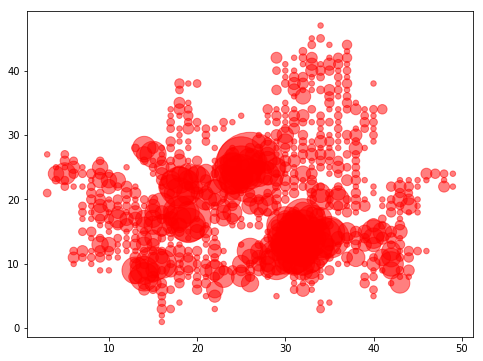

In [74]:
#colors = np.random.rand(41)

df_selected_time = df[(df['total_mins_quater'] == 95)]
df_selected_time.head()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_time['coord_x'].values, df_selected_time['coord_y'].values, 
            s=df_selected_time['count'].values*30, c='red', alpha=0.5)


## AM 06:00 Real Demand 


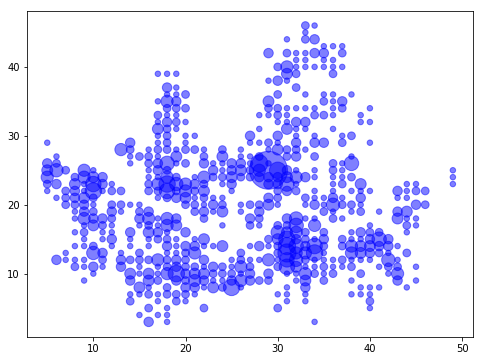

In [75]:

df_selected_time = df[(df['total_mins_quater'] == 106)]
df_selected_time.head()

#colors = np.random.rand(41)

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_time['coord_x'].values, df_selected_time['coord_y'].values, 
            s=df_selected_time['count'].values*30, c='blue', alpha=0.5)

